In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# 한글깨짐 방지
import koreanize_matplotlib

In [3]:
# 데이터 불러오기
path='../data/Paris/listings.csv'
pd.read_csv(path)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3109,https://www.airbnb.com/rooms/3109,20240316023852,2024-03-19,city scrape,zen and calm,Lovely Appartment with one bedroom with a Quee...,Good restaurants<br />very close the Montparna...,https://a0.muscache.com/pictures/miso/Hosting-...,3631,...,5.00,5.00,5.00,7511409139079,f,1,1,0,0,0.05
1,165409,https://www.airbnb.com/rooms/165409,20240316023852,2024-03-19,city scrape,studio charme Haut Marais PARIS,You'll love this typical parisian flat.,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,788732,...,4.89,4.95,4.74,7510309597559,f,1,1,0,0,0.69
2,5396,https://www.airbnb.com/rooms/5396,20240316023852,2024-03-18,city scrape,Your perfect Paris studio on Île Saint-Louis,"NEW SOFA-BED SINCE JUNE 2023, Please disregard...","You are within walking distance to the Louvre,...",https://a0.muscache.com/pictures/52413/f9bf76f...,7903,...,4.84,4.96,4.58,7510402838018,f,2,1,1,0,2.19
3,166370,https://www.airbnb.com/rooms/166370,20240316023852,2024-03-16,city scrape,Big appartment with view 4 people,"2 Bedrooms apartment for up to 4 people, with ...",The avenue is located nearby the animated dist...,https://a0.muscache.com/pictures/74224563/6c9e...,793032,...,4.79,4.65,4.48,7511007974397,f,1,1,0,0,0.51
4,39948,https://www.airbnb.com/rooms/39948,20240316023852,2024-03-19,previous scrape,COSY INDEPENDENT ROOM IN CENTRAL PARIS,Large newly-renovated guest room in central Pa...,"Located in the heart of Paris, The Montorgueil...",https://a0.muscache.com/pictures/f898fb0b-e72e...,171483,...,4.97,4.94,4.82,7510200734360,f,1,0,1,0,0.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84392,1112562855977040914,https://www.airbnb.com/rooms/1112562855977040914,20240316023852,2024-03-19,city scrape,Artists neighbour apt /private yard 10mn Print...,Simplify your life at this peaceful place<br /...,NaN,https://a0.muscache.com/pictures/692d2ee5-8469...,448413156,...,NaN,NaN,NaN,7510164795125,t,15,15,0,0,NaN
84393,1112591023192990750,https://www.airbnb.com/rooms/1112591023192990750,20240316023852,2024-03-18,city scrape,Appartement Tour Eiffel - Porte Dauphine - 2 Pers,Nestled in the heart of the prestigious 16th a...,"A l’orée du bois, le jardin du Ranelagh est un...",https://a0.muscache.com/pictures/miso/Hosting-...,528792181,...,NaN,NaN,NaN,7511612355663,t,6,6,0,0,NaN
84394,1112842648117310093,https://www.airbnb.com/rooms/1112842648117310093,20240316023852,2024-03-19,city scrape,1621: Prime spot in Paris Olympic Games 2024,Discover the allure of our generously proporti...,Embark on an enchanting voyage of discovery th...,https://a0.muscache.com/pictures/prohost-api/H...,530443572,...,NaN,NaN,NaN,7510912350413,t,6,6,0,0,NaN
84395,1112843324939236177,https://www.airbnb.com/rooms/1112843324939236177,20240316023852,2024-03-18,city scrape,Stylish flat in the heart of the city,Welcome to Paris! We are delighted to welcome ...,The 6th arrondissement is home to Saint-Germai...,https://a0.muscache.com/pictures/prohost-api/H...,504268004,...,NaN,NaN,NaN,7510608018554,t,47,47,0,0,NaN


In [4]:
raw = pd.read_csv(path)
dat = raw.copy()
dat.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3109,https://www.airbnb.com/rooms/3109,20240316023852,2024-03-19,city scrape,zen and calm,Lovely Appartment with one bedroom with a Quee...,Good restaurants<br />very close the Montparna...,https://a0.muscache.com/pictures/miso/Hosting-...,3631,...,5.00,5.00,5.00,7511409139079,f,1,1,0,0,0.05
1,165409,https://www.airbnb.com/rooms/165409,20240316023852,2024-03-19,city scrape,studio charme Haut Marais PARIS,You'll love this typical parisian flat.,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,788732,...,4.89,4.95,4.74,7510309597559,f,1,1,0,0,0.69
2,5396,https://www.airbnb.com/rooms/5396,20240316023852,2024-03-18,city scrape,Your perfect Paris studio on Île Saint-Louis,"NEW SOFA-BED SINCE JUNE 2023, Please disregard...","You are within walking distance to the Louvre,...",https://a0.muscache.com/pictures/52413/f9bf76f...,7903,...,4.84,4.96,4.58,7510402838018,f,2,1,1,0,2.19
3,166370,https://www.airbnb.com/rooms/166370,20240316023852,2024-03-16,city scrape,Big appartment with view 4 people,"2 Bedrooms apartment for up to 4 people, with ...",The avenue is located nearby the animated dist...,https://a0.muscache.com/pictures/74224563/6c9e...,793032,...,4.79,4.65,4.48,7511007974397,f,1,1,0,0,0.51
4,39948,https://www.airbnb.com/rooms/39948,20240316023852,2024-03-19,previous scrape,COSY INDEPENDENT ROOM IN CENTRAL PARIS,Large newly-renovated guest room in central Pa...,"Located in the heart of Paris, The Montorgueil...",https://a0.muscache.com/pictures/f898fb0b-e72e...,171483,...,4.97,4.94,4.82,7510200734360,f,1,0,1,0,0.99


property_type (숙소_유형) 추가
 - room_type 컬럼명 변경 : 숙소_유형 -> 방_유형

In [5]:
# 숙소 관련 테이블
# 02와 변경점 ('host_response_time','host_response_rate','host_acceptance_rate'[ 답변_평균시간, 문의_응답률, 예약_수락률] 삭제)
# >> 이유 : 슈퍼 호스트 기준에 포함되는 속성들이라 중복됨.
df_lodging = dat[['id', 'host_id','listing_url','host_is_superhost','host_total_listings_count','neighbourhood_cleansed', 'room_type',
                  'property_type','accommodates','bathrooms','bedrooms','beds','amenities','price','minimum_nights','maximum_nights']]
df_lodging.head(3)

,id,host_id,listing_url,host_is_superhost,host_total_listings_count,neighbourhood_cleansed,room_type,property_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights
0,3109,3631,https://www.airbnb.com/rooms/3109,f,2.0,Observatoire,Entire home/apt,Entire rental unit,2,1.0,1.0,1.0,"[""Cooking basics"", ""Luggage dropoff allowed"", ...",$250.00,2,30
1,165409,788732,https://www.airbnb.com/rooms/165409,t,1.0,Temple,Entire home/apt,Entire rental unit,2,1.0,0.0,1.0,"[""Lockbox"", ""Wifi"", ""Kitchen"", ""Refrigerator"",...",$140.00,3,365
2,5396,7903,https://www.airbnb.com/rooms/5396,f,3.0,Hôtel-de-Ville,Entire home/apt,Entire rental unit,2,1.0,0.0,1.0,"[""Cooking basics"", ""Long term stays allowed"", ...",$107.00,1,1125


In [6]:
# 컬럼명 변경

df_lodging = df_lodging.rename(columns={
    'id': '숙소_id',
    'host_id': '호스트_id',
    'listing_url':'url',
    'host_is_superhost': '슈퍼호스트',
    'host_total_listings_count': '숙소_수',
    'neighbourhood_cleansed': '숙소_지역',
    'room_type': '숙소_유형',
    'property_type':'숙소_특징',
    'accommodates': '수용_인원수',
    'bathrooms': '욕실수',
    'bedrooms': '침실수',
    'beds': '침대수',
    'amenities': '편의시설',
    'price': '숙소_가격',
    'minimum_nights': '최소_숙박일',
    'maximum_nights': '최대_숙박일'
})

df_lodging.head(3)


,숙소_id,호스트_id,url,슈퍼호스트,숙소_수,숙소_지역,숙소_유형,숙소_특징,수용_인원수,욕실수,침실수,침대수,편의시설,숙소_가격,최소_숙박일,최대_숙박일
0,3109,3631,https://www.airbnb.com/rooms/3109,f,2.0,Observatoire,Entire home/apt,Entire rental unit,2,1.0,1.0,1.0,"[""Cooking basics"", ""Luggage dropoff allowed"", ...",$250.00,2,30
1,165409,788732,https://www.airbnb.com/rooms/165409,t,1.0,Temple,Entire home/apt,Entire rental unit,2,1.0,0.0,1.0,"[""Lockbox"", ""Wifi"", ""Kitchen"", ""Refrigerator"",...",$140.00,3,365
2,5396,7903,https://www.airbnb.com/rooms/5396,f,3.0,Hôtel-de-Ville,Entire home/apt,Entire rental unit,2,1.0,0.0,1.0,"[""Cooking basics"", ""Long term stays allowed"", ...",$107.00,1,1125


In [7]:
# 리뷰 데이터 테이블
df_review = dat[['number_of_reviews', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 
                'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
                'review_scores_location', 'review_scores_value', 'reviews_per_month']]
df_review.head(3)


,number_of_reviews,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,4,0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.05
1,106,0,4.68,4.72,4.59,4.87,4.89,4.95,4.74,0.69
2,393,5,4.60,4.63,4.57,4.81,4.84,4.96,4.58,2.19


In [8]:
# 컬럼명 변경
df_review = df_review.rename(columns={
    'number_of_reviews': '리뷰수',
    'number_of_reviews_l30d': '30일_리뷰수',
    'review_scores_rating': '리뷰점수',
    'review_scores_accuracy': '숙소_정확성_리뷰점수',
    'review_scores_cleanliness': '숙소_청결도_리뷰점수',
    'review_scores_checkin': '숙소_체크인_리뷰점수',
    'review_scores_communication': '숙소_소통_리뷰점수',
    'review_scores_location': '숙소_위치_리뷰점수',
    'review_scores_value': '숙소_가격_리뷰점수',
    'reviews_per_month': '평균_리뷰수'
})
df_review.head()


,리뷰수,30일_리뷰수,리뷰점수,숙소_정확성_리뷰점수,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,평균_리뷰수
0,4,0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.05
1,106,0,4.68,4.72,4.59,4.87,4.89,4.95,4.74,0.69
2,393,5,4.60,4.63,4.57,4.81,4.84,4.96,4.58,2.19
3,78,0,4.56,4.74,4.37,4.82,4.79,4.65,4.48,0.51
4,126,3,4.86,4.93,4.82,4.96,4.97,4.94,4.82,0.99


01 전처리 과정 중 통합된 테이블의 필요성을 느낌

In [9]:
# 테이블 합치기
df = pd.concat([df_lodging,df_review], axis=1)
df.head()

,숙소_id,호스트_id,url,슈퍼호스트,숙소_수,숙소_지역,숙소_유형,숙소_특징,수용_인원수,욕실수,...,리뷰수,30일_리뷰수,리뷰점수,숙소_정확성_리뷰점수,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,평균_리뷰수
0,3109,3631,https://www.airbnb.com/rooms/3109,f,2.0,Observatoire,Entire home/apt,Entire rental unit,2,1.0,...,4,0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.05
1,165409,788732,https://www.airbnb.com/rooms/165409,t,1.0,Temple,Entire home/apt,Entire rental unit,2,1.0,...,106,0,4.68,4.72,4.59,4.87,4.89,4.95,4.74,0.69
2,5396,7903,https://www.airbnb.com/rooms/5396,f,3.0,Hôtel-de-Ville,Entire home/apt,Entire rental unit,2,1.0,...,393,5,4.60,4.63,4.57,4.81,4.84,4.96,4.58,2.19
3,166370,793032,https://www.airbnb.com/rooms/166370,f,3.0,Entrepôt,Entire home/apt,Entire rental unit,4,1.0,...,78,0,4.56,4.74,4.37,4.82,4.79,4.65,4.48,0.51
4,39948,171483,https://www.airbnb.com/rooms/39948,t,2.0,Bourse,Private room,Private room in guest suite,2,NaN,...,126,3,4.86,4.93,4.82,4.96,4.97,4.94,4.82,0.99


In [10]:
# 정보 확인
df.info()
# total 24 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84397 entries, 0 to 84396
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   숙소_id        84397 non-null  int64  
 1   호스트_id       84397 non-null  int64  
 2   url          84397 non-null  object 
 3   슈퍼호스트        84306 non-null  object 
 4   숙소_수         84390 non-null  float64
 5   숙소_지역        84397 non-null  object 
 6   숙소_유형        84397 non-null  object 
 7   숙소_특징        84397 non-null  object 
 8   수용_인원수       84397 non-null  int64  
 9   욕실수          60959 non-null  float64
 10  침실수          77480 non-null  float64
 11  침대수          60828 non-null  float64
 12  편의시설         84397 non-null  object 
 13  숙소_가격        60917 non-null  object 
 14  최소_숙박일       84397 non-null  int64  
 15  최대_숙박일       84397 non-null  int64  
 16  리뷰수          84397 non-null  int64  
 17  30일_리뷰수      84397 non-null  int64  
 18  리뷰점수         58827 non-null  float64
 19  숙소_정

In [11]:
df.isnull().sum()

숙소_id              0
호스트_id             0
url                0
슈퍼호스트             91
숙소_수               7
숙소_지역              0
숙소_유형              0
숙소_특징              0
수용_인원수             0
욕실수            23438
침실수             6917
침대수            23569
편의시설               0
숙소_가격          23480
최소_숙박일             0
최대_숙박일             0
리뷰수                0
30일_리뷰수            0
리뷰점수           25570
숙소_정확성_리뷰점수    25604
숙소_청결도_리뷰점수    25600
숙소_체크인_리뷰점수    25613
숙소_소통_리뷰점수     25602
숙소_위치_리뷰점수     25610
숙소_가격_리뷰점수     25615
평균_리뷰수         25575
dtype: int64

결측치 제거 확정 <br>
- 슈퍼호스트 null값 (91개) 5%이하
- 리뷰수 = 0인 값--> 리뷰수가 없으면 리뷰점수도 없다
- 숙소수 null값 (7개)
- 리뷰분야 6개 전부 nan값인 컬럼
- 숙소_유형 -> 다른 컬럼(욕실,침실,침대,가격 등)에서 문제가 많은 Shared room과 Hotel room 제거
- 숙소_특징 -> 일단 개인 판단으로 진행

리뷰수가 0개인 값 제거

In [12]:
df[df['리뷰수'] == 0]

,숙소_id,호스트_id,url,슈퍼호스트,숙소_수,숙소_지역,숙소_유형,숙소_특징,수용_인원수,욕실수,...,리뷰수,30일_리뷰수,리뷰점수,숙소_정확성_리뷰점수,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,평균_리뷰수
19,9359,28422,https://www.airbnb.com/rooms/9359,f,4.0,Louvre,Entire home/apt,Entire rental unit,1,1.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,191531,926484,https://www.airbnb.com/rooms/191531,f,2.0,Temple,Entire home/apt,Entire rental unit,2,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,214596,1107785,https://www.airbnb.com/rooms/214596,f,2.0,Observatoire,Entire home/apt,Entire rental unit,2,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,17316,67192,https://www.airbnb.com/rooms/17316,f,1.0,Entrepôt,Entire home/apt,Entire rental unit,2,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,25450,105570,https://www.airbnb.com/rooms/25450,f,1.0,Entrepôt,Entire home/apt,Entire rental unit,6,2.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84392,1112562855977040914,448413156,https://www.airbnb.com/rooms/1112562855977040914,f,44.0,Opéra,Entire home/apt,Entire rental unit,2,1.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84393,1112591023192990750,528792181,https://www.airbnb.com/rooms/1112591023192990750,f,14.0,Passy,Entire home/apt,Entire rental unit,2,1.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84394,1112842648117310093,530443572,https://www.airbnb.com/rooms/1112842648117310093,f,25.0,Opéra,Entire home/apt,Entire rental unit,4,1.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84395,1112843324939236177,504268004,https://www.airbnb.com/rooms/1112843324939236177,f,65.0,Panthéon,Entire home/apt,Entire rental unit,4,1.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df = df[df['리뷰수'] != 0]

In [14]:
df.isnull().sum()

숙소_id              0
호스트_id             0
url                0
슈퍼호스트             77
숙소_수               0
숙소_지역              0
숙소_유형              0
숙소_특징              0
수용_인원수             0
욕실수            16979
침실수             5018
침대수            17052
편의시설               0
숙소_가격          17011
최소_숙박일             0
최대_숙박일             0
리뷰수                0
30일_리뷰수            0
리뷰점수               0
숙소_정확성_리뷰점수       34
숙소_청결도_리뷰점수       30
숙소_체크인_리뷰점수       43
숙소_소통_리뷰점수        32
숙소_위치_리뷰점수        40
숙소_가격_리뷰점수        45
평균_리뷰수             0
dtype: int64

In [15]:
df.shape

(58821, 26)

리뷰 세부항목 컬럼들이 모두 null값인 행 삭제

In [16]:
# 리뷰 세부항목 컬럼들이 모두 null값인 행 삭제
df = df.dropna(subset=['숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수'], how='all', inplace=False)

In [17]:
df.isnull().sum()

숙소_id              0
호스트_id             0
url                0
슈퍼호스트             77
숙소_수               0
숙소_지역              0
숙소_유형              0
숙소_특징              0
수용_인원수             0
욕실수            16974
침실수             5015
침대수            17048
편의시설               0
숙소_가격          17007
최소_숙박일             0
최대_숙박일             0
리뷰수                0
30일_리뷰수            0
리뷰점수               0
숙소_정확성_리뷰점수        7
숙소_청결도_리뷰점수        3
숙소_체크인_리뷰점수       16
숙소_소통_리뷰점수         5
숙소_위치_리뷰점수        13
숙소_가격_리뷰점수        18
평균_리뷰수             0
dtype: int64

In [18]:
df.shape

(58794, 26)

슈퍼 호스트 결측치 처리

In [19]:
df['슈퍼호스트'].isnull().sum()

77

In [20]:
# 슈퍼호스트 결측치 개수가 전체 데이터에 몇 퍼센트인지 확인
77 / 84397 * 100 
# 0.09% -> 재거 가능

0.09123547045511096

In [21]:
df = df.dropna(subset=['슈퍼호스트'])

In [22]:
# 다른 null값 확인
df.isnull().sum()

숙소_id              0
호스트_id             0
url                0
슈퍼호스트              0
숙소_수               0
숙소_지역              0
숙소_유형              0
숙소_특징              0
수용_인원수             0
욕실수            16956
침실수             5005
침대수            17030
편의시설               0
숙소_가격          16989
최소_숙박일             0
최대_숙박일             0
리뷰수                0
30일_리뷰수            0
리뷰점수               0
숙소_정확성_리뷰점수        7
숙소_청결도_리뷰점수        3
숙소_체크인_리뷰점수       16
숙소_소통_리뷰점수         5
숙소_위치_리뷰점수        13
숙소_가격_리뷰점수        18
평균_리뷰수             0
dtype: int64

In [23]:
df.shape

(58717, 26)

숙소_유형
 - Hotel room 과 Shared room 제거

In [24]:
df['숙소_유형'].value_counts()

숙소_유형
Entire home/apt    51815
Private room        5991
Hotel room           607
Shared room          304
Name: count, dtype: int64

In [25]:
print(445 / 58723 * 100)
print(200 / 58723 * 100)
# Hotel room    0.7 %
# Shared room   0.3 %
# 5% 미만 확인

0.757795071777668
0.3405820547315362


In [26]:
# '숙소_유형' 컬럼에서 'Hotel room'과 'Shared room'이 아닌 행들만 필터링
filtered_df = df[~df['숙소_유형'].isin(['Hotel room', 'Shared room'])]

# 필터링된 데이터프레임을 다시 df에 할당
df = filtered_df

In [27]:
df['숙소_유형'].value_counts()

숙소_유형
Entire home/apt    51815
Private room        5991
Name: count, dtype: int64

In [28]:
df.shape

(57806, 26)

In [29]:
df.isnull().sum()

숙소_id              0
호스트_id             0
url                0
슈퍼호스트              0
숙소_수               0
숙소_지역              0
숙소_유형              0
숙소_특징              0
수용_인원수             0
욕실수            16691
침실수             4900
침대수            16711
편의시설               0
숙소_가격          16723
최소_숙박일             0
최대_숙박일             0
리뷰수                0
30일_리뷰수            0
리뷰점수               0
숙소_정확성_리뷰점수        7
숙소_청결도_리뷰점수        3
숙소_체크인_리뷰점수       16
숙소_소통_리뷰점수         5
숙소_위치_리뷰점수        13
숙소_가격_리뷰점수        18
평균_리뷰수             0
dtype: int64

숙소_특징
 - top 10 선정 나머지 값 제거
 - 이유 : 특수한 숙박(보트, 동굴, 작은 집 등)이 존재하여, 다른 컬럼(욕실,침실,침대, 가격 등)에 결측치 처리에 어려움을 겪어서 많이 존재하는 숙박종류 top 10으로 임의 선정하여 전처리를 진행하겠음.

In [30]:
# top 10 만 남기기
top_10_types = df['숙소_특징'].value_counts().nlargest(10).index

df = df[df['숙소_특징'].isin(top_10_types)]

In [31]:
df['숙소_특징'].value_counts()

숙소_특징
Entire rental unit                   47920
Private room in rental unit           4035
Entire condo                          2103
Entire loft                            850
Room in hotel                          521
Room in boutique hotel                 391
Private room in bed and breakfast      335
Private room in condo                  306
Entire home                            295
Entire serviced apartment              258
Name: count, dtype: int64

### TOP 10 값 확인
 - Entire rental unit                   : 전체 임대 유닛으로, 집 전체를 단독으로 사용할 수 있는 숙소입니다.
 - Private room in rental unit          : 임대 유닛 내의 개인실로, 공용 공간을 제외한 개인 공간을 사용할 수 있습니다.
 - Entire condo                         : 콘도 전체를 단독으로 사용할 수 있는 숙소입니다.
 - Entire loft                          : 로프트 전체를 단독으로 사용할 수 있는 숙소입니다.
 - Room in hotel                        : 호텔 내의 객실로, 공용 공간을 제외한 개인 공간을 사용할 수 있습니다.
 - Room in boutique hotel               : 부티크 호텔 내의 객실로, 공용 공간을 제외한 개인 공간을 사용할 수 있습니다.
 - Private room in bed and breakfast    : 숙박과 함께 아침 식사를 제공하는 개인실로, 공용 공간을 제외한 개인 공간을 사용할 수 있습니다.
 - Private room in condo                : 콘도 내의 개인실로, 공용 공간을 제외한 개인 공간을 사용할 수 있습니다.
 - Entire home                          : 집 전체를 단독으로 사용할 수 있는 숙소입니다.
 - Entire serviced apartment            : 서비스드 아파트 전체를 단독으로 사용할 수 있는 숙소입니다.
 

In [32]:
df.shape

(57014, 26)

가격 결측치 처리
 - 숙소_유형별, 숙소_특징별, 수용_인원수별로 묶어서 knn(최근접대체)사용

In [33]:
# '$' 기호와 ',' 제거 후 실수(float) 형태로 변환
df['숙소_가격'] = round(df['숙소_가격'].replace('[\$,]', '', regex=True).astype(float),2)
df['숙소_가격']

C:\Users\rladn\AppData\Local\Temp\ipykernel_6324\1949511110.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['숙소_가격'] = round(df['숙소_가격'].replace('[\$,]', '', regex=True).astype(float),2)


0        250.0
1        140.0
2        107.0
3        200.0
5          NaN
         ...  
83487    173.0
83547     79.0
83589    145.0
83687     95.0
84153     60.0
Name: 숙소_가격, Length: 57014, dtype: float64

숙소_가격 결측치 처리를 위한 범주형 데이터 라벨링 인코딩
 - 슈퍼호스트, 숙소_지역, 숙소_유형, 숙소_특징
 - 우선 KNN 대체법

In [34]:
# 숙소 유형과 숙소 특징을 수치형으로 변환
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['슈퍼호스트_encoded'] = label_encoder.fit_transform(df['슈퍼호스트'])
df['숙소_지역_encoded'] = label_encoder.fit_transform(df['숙소_지역'])
df['숙소_유형_encoded'] = label_encoder.fit_transform(df['숙소_유형'])
df['숙소_특징_encoded'] = label_encoder.fit_transform(df['숙소_특징'])

C:\Users\rladn\AppData\Local\Temp\ipykernel_6324\3558244031.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['슈퍼호스트_encoded'] = label_encoder.fit_transform(df['슈퍼호스트'])
C:\Users\rladn\AppData\Local\Temp\ipykernel_6324\3558244031.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['숙소_지역_encoded'] = label_encoder.fit_transform(df['숙소_지역'])
C:\Users\rladn\AppData\Local\Temp\ipykernel_6324\3558244031.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [35]:
print(df['슈퍼호스트_encoded'].head(3))
print(df['숙소_지역_encoded'].head(3))
print(df['숙소_유형_encoded'].head(3))
print(df['숙소_특징_encoded'].head(3))

0    0
1    1
2    0
Name: 슈퍼호스트_encoded, dtype: int32
0    10
1    17
2     6
Name: 숙소_지역_encoded, dtype: int32
0    0
1    0
2    0
Name: 숙소_유형_encoded, dtype: int32
0    3
1    3
2    3
Name: 숙소_특징_encoded, dtype: int32


In [36]:
from sklearn.impute import KNNImputer
import pandas as pd
import numpy as np

# 대체된 값들을 저장할 데이터프레임 초기화
imputed_values = pd.DataFrame(columns=['숙소_유형', '숙소_특징', '인덱스', '대체된_숙소_가격'])

# 먼저 숙소 유형별로 데이터를 분리하고, 그 안에서 숙소 특징별로 다시 분리
dfs = {}
for room_type in df['숙소_유형'].unique():
    for feature in df['숙소_특징'].unique():
        mask = (df['숙소_유형'] == room_type) & (df['숙소_특징'] == feature)
        subset = df[mask]
        if not subset.empty:  # 데이터가 있을 경우에만 처리
            key = (room_type, feature)
            dfs[key] = subset

# KNN 대체 실행
imputer = KNNImputer(n_neighbors=10)
for key, data in dfs.items():
    data_imputed = data.copy()

    # 숙소_가격 추가
    numeric_columns = ['숙소_가격']
    
    # 해당 열들에 대해서만 imputer 적용
    data_imputed[numeric_columns] = imputer.fit_transform(data[numeric_columns])
    
    # 대체된 값들만 추출
    mask_imputed = data[numeric_columns].isna() & data_imputed[numeric_columns].notna()
    imputed_subset = data_imputed[mask_imputed.any(axis=1)]  # 대체된 값 중 하나라도 있는 행 선택
    
    if not imputed_subset.empty:
        # 대체된 값들을 저장
        temp_df = pd.DataFrame({
            '숙소_유형': key[0],
            '숙소_특징': key[1],
            '인덱스': imputed_subset.index,
            '대체된_숙소_가격': imputed_subset['숙소_가격']
        })
        imputed_values = pd.concat([imputed_values, temp_df], ignore_index=True)
    
    # 원래 데이터프레임에 대체된 값 업데이트
    df.loc[data.index, numeric_columns] = data_imputed[numeric_columns]

# 대체된 값들 확인
print(imputed_values)


C:\Users\rladn\AppData\Local\Temp\ipykernel_6324\151437249.py:41: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  imputed_values = pd.concat([imputed_values, temp_df], ignore_index=True)


                 숙소_유형               숙소_특징    인덱스   대체된_숙소_가격
0      Entire home/apt  Entire rental unit      5  206.101670
1      Entire home/apt  Entire rental unit     11  206.101670
2      Entire home/apt  Entire rental unit     20  206.101670
3      Entire home/apt  Entire rental unit     24  206.101670
4      Entire home/apt  Entire rental unit     28  206.101670
...                ...                 ...    ...         ...
16539     Private room       Room in hotel  66130  206.749367
16540     Private room       Room in hotel  66163  206.749367
16541     Private room       Room in hotel  66588  206.749367
16542     Private room       Room in hotel  66777  206.749367
16543     Private room       Room in hotel  74153  206.749367

[16544 rows x 4 columns]


 욕실,침실,침대수 결측치 처리
  - knn 사용

In [37]:
df.isnull().sum()

숙소_id                0
호스트_id               0
url                  0
슈퍼호스트                0
숙소_수                 0
숙소_지역                0
숙소_유형                0
숙소_특징                0
수용_인원수               0
욕실수              16512
침실수               4834
침대수              16532
편의시설                 0
숙소_가격                0
최소_숙박일               0
최대_숙박일               0
리뷰수                  0
30일_리뷰수              0
리뷰점수                 0
숙소_정확성_리뷰점수          7
숙소_청결도_리뷰점수          3
숙소_체크인_리뷰점수         16
숙소_소통_리뷰점수           5
숙소_위치_리뷰점수          13
숙소_가격_리뷰점수          18
평균_리뷰수               0
슈퍼호스트_encoded        0
숙소_지역_encoded        0
숙소_유형_encoded        0
숙소_특징_encoded        0
dtype: int64

In [38]:
from sklearn.impute import KNNImputer
import pandas as pd
import numpy as np

# 대체된 값들을 저장할 데이터프레임 초기화
imputed_values = pd.DataFrame(columns=['숙소_유형', '숙소_특징', '인덱스', '대체된_욕실수', '대체된_침실수', '대체된_침대수'])

# 먼저 숙소 유형별로 데이터를 분리하고, 그 안에서 숙소 특징별로 다시 분리
dfs = {}
for room_type in df['숙소_유형'].unique():
    for feature in df['숙소_특징'].unique():
        mask = (df['숙소_유형'] == room_type) & (df['숙소_특징'] == feature)
        subset = df[mask]
        if not subset.empty:  # 데이터가 있을 경우에만 처리
            key = (room_type, feature)
            dfs[key] = subset

# KNN 대체 실행
imputer = KNNImputer(n_neighbors=10)
for key, data in dfs.items():
    data_imputed = data.copy()

    # 욕실수, 침실수, 침대수 열도 추가
    numeric_columns = ['욕실수', '침실수', '침대수']
    
    # 해당 열들에 대해서만 imputer 적용
    data_imputed[numeric_columns] = imputer.fit_transform(data[numeric_columns])
    
    # 대체된 값들만 추출
    mask_imputed = data[numeric_columns].isna() & data_imputed[numeric_columns].notna()
    imputed_subset = data_imputed[mask_imputed.any(axis=1)]  # 대체된 값 중 하나라도 있는 행 선택
    
    if not imputed_subset.empty:
        # 대체된 값들을 저장
        temp_df = pd.DataFrame({
            '숙소_유형': key[0],
            '숙소_특징': key[1],
            '인덱스': imputed_subset.index,
            '대체된_욕실수': imputed_subset['욕실수'],
            '대체된_침실수': imputed_subset['침실수'],
            '대체된_침대수': imputed_subset['침대수']
        })
        imputed_values = pd.concat([imputed_values, temp_df], ignore_index=True)
    
    # 원래 데이터프레임에 대체된 값 업데이트
    df.loc[data.index, numeric_columns] = data_imputed[numeric_columns]

# 대체된 값들 확인
print(imputed_values)


C:\Users\rladn\AppData\Local\Temp\ipykernel_6324\1282889737.py:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  imputed_values = pd.concat([imputed_values, temp_df], ignore_index=True)


                 숙소_유형               숙소_특징    인덱스  대체된_욕실수  대체된_침실수  대체된_침대수
0      Entire home/apt  Entire rental unit      5      1.1      1.0      1.3
1      Entire home/apt  Entire rental unit     11      1.1      1.0      1.3
2      Entire home/apt  Entire rental unit     20      1.1      1.0      1.3
3      Entire home/apt  Entire rental unit     24      1.1      1.0      1.3
4      Entire home/apt  Entire rental unit     28      1.2      2.0      2.6
...                ...                 ...    ...      ...      ...      ...
16578     Private room       Room in hotel  55834      1.0      1.0      1.3
16579     Private room       Room in hotel  66130      1.0      1.0      1.3
16580     Private room       Room in hotel  66163      1.0      1.0      1.3
16581     Private room       Room in hotel  66777      1.8      2.0      2.8
16582     Private room       Room in hotel  74153      1.0      1.0      1.3

[16583 rows x 6 columns]


In [39]:
df.isnull().sum()

숙소_id             0
호스트_id            0
url               0
슈퍼호스트             0
숙소_수              0
숙소_지역             0
숙소_유형             0
숙소_특징             0
수용_인원수            0
욕실수               0
침실수               0
침대수               0
편의시설              0
숙소_가격             0
최소_숙박일            0
최대_숙박일            0
리뷰수               0
30일_리뷰수           0
리뷰점수              0
숙소_정확성_리뷰점수       7
숙소_청결도_리뷰점수       3
숙소_체크인_리뷰점수      16
숙소_소통_리뷰점수        5
숙소_위치_리뷰점수       13
숙소_가격_리뷰점수       18
평균_리뷰수            0
슈퍼호스트_encoded     0
숙소_지역_encoded     0
숙소_유형_encoded     0
숙소_특징_encoded     0
dtype: int64

In [40]:
df[['욕실수','침실수','침대수']]

,욕실수,침실수,침대수
0,1.0,1.0,1.0
1,1.0,0.0,1.0
2,1.0,0.0,1.0
3,1.0,1.0,1.0
5,1.1,1.0,1.3
...,...,...,...
83487,1.0,2.0,0.0
83547,1.0,0.0,1.0
83589,1.0,1.0,0.0
83687,1.0,1.0,0.0


리뷰 상세 항목 결측치 처리
 - knn

In [41]:
df.shape

(57014, 30)

In [42]:
df.isnull().sum()

숙소_id             0
호스트_id            0
url               0
슈퍼호스트             0
숙소_수              0
숙소_지역             0
숙소_유형             0
숙소_특징             0
수용_인원수            0
욕실수               0
침실수               0
침대수               0
편의시설              0
숙소_가격             0
최소_숙박일            0
최대_숙박일            0
리뷰수               0
30일_리뷰수           0
리뷰점수              0
숙소_정확성_리뷰점수       7
숙소_청결도_리뷰점수       3
숙소_체크인_리뷰점수      16
숙소_소통_리뷰점수        5
숙소_위치_리뷰점수       13
숙소_가격_리뷰점수       18
평균_리뷰수            0
슈퍼호스트_encoded     0
숙소_지역_encoded     0
숙소_유형_encoded     0
숙소_특징_encoded     0
dtype: int64

리뷰 세부 항목 제거하고, pariplot 그려보고, 상관계수 표 확인하고, 비트맵 그리고, 회귀모델 돌려보기
 - 일단 너무 피곤해서 여기까지만...(pca분석에서 너무 많이 걸림ㅠ)

In [43]:
# 혹시 몰라서 다른 변수에 저장
df_clean = df.copy()

In [44]:
df_clean = df_clean.dropna(subset=['숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수'])

In [45]:
df_clean.columns

Index(['숙소_id', '호스트_id', 'url', '슈퍼호스트', '숙소_수', '숙소_지역', '숙소_유형', '숙소_특징',
       '수용_인원수', '욕실수', '침실수', '침대수', '편의시설', '숙소_가격', '최소_숙박일', '최대_숙박일',
       '리뷰수', '30일_리뷰수', '리뷰점수', '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수',
       '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수', '평균_리뷰수', '슈퍼호스트_encoded',
       '숙소_지역_encoded', '숙소_유형_encoded', '숙소_특징_encoded'],
      dtype='object')

지금까지의 전처리 진행 내용
- 결측치 제거 확정 <br>
- 슈퍼호스트 null값 (91개) 5%이하
- 리뷰수 = 0인 값 제거--> 리뷰수가 없으면 리뷰점수도 없다
- 숙소수 null값 (7개)
- 리뷰분야 6개 전부 nan값인 컬럼
- 숙소_유형 -> 다른 컬럼(욕실,침실,침대,가격 등)에서 문제가 많은 Shared room과 Hotel room 제거
- 숙소_특징 -> 일단 개인 판단으로 진행 -> 빈도수 확인 후 top10만 선정
- 숙소_가격 -> 숙소_유형,특징 라벨링 -> 유형별,특징별 knn 대체(k=10으로 진행함)
- 욕실수, 침실수, 침대수 -> 숙소_가격과 동일하게 knn대체
- 리뷰 상세 항목들 -> 결측치가 별로 없어 제거

df 전체 정규화 진행

In [46]:
# 정규화에 불필요한 컬럼 삭제
df_clean.drop(columns=['숙소_id', '호스트_id', 'url', '슈퍼호스트', '숙소_지역', '숙소_유형', '숙소_특징','편의시설'],inplace=True)
df_clean.head()

,숙소_수,수용_인원수,욕실수,침실수,침대수,숙소_가격,최소_숙박일,최대_숙박일,리뷰수,30일_리뷰수,...,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,평균_리뷰수,슈퍼호스트_encoded,숙소_지역_encoded,숙소_유형_encoded,숙소_특징_encoded
0,2.0,2,1.0,1.0,1.0,250.00000,2,30,4,0,...,5.00,5.00,5.00,5.00,5.00,0.05,0,10,0,3
1,1.0,2,1.0,0.0,1.0,140.00000,3,365,106,0,...,4.59,4.87,4.89,4.95,4.74,0.69,1,17,0,3
2,3.0,2,1.0,0.0,1.0,107.00000,1,1125,393,5,...,4.57,4.81,4.84,4.96,4.58,2.19,0,6,0,3
3,3.0,4,1.0,1.0,1.0,200.00000,2,120,78,0,...,4.37,4.82,4.79,4.65,4.48,0.51,0,4,0,3
5,2.0,4,1.1,1.0,1.3,206.10167,365,365,11,0,...,5.00,4.88,4.88,4.88,5.00,0.07,0,15,0,3


In [47]:
# 정규화(minmaxscaler)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_clean), columns=df_clean.columns)


In [48]:
df_normalized.head()

,숙소_수,수용_인원수,욕실수,침실수,침대수,숙소_가격,최소_숙박일,최대_숙박일,리뷰수,30일_리뷰수,...,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,평균_리뷰수,슈퍼호스트_encoded,숙소_지역_encoded,숙소_유형_encoded,숙소_특징_encoded
0,0.000177,0.066667,0.020833,0.02,0.012987,0.004546,0.000891,1.350418e-08,0.001033,0.000000,...,1.000,1.000,1.000,1.000,1.000,0.001079,0.0,0.526316,0.0,0.333333
1,0.000000,0.066667,0.020833,0.00,0.012987,0.002480,0.001783,1.695007e-07,0.036157,0.000000,...,0.918,0.974,0.978,0.990,0.948,0.018339,1.0,0.894737,0.0,0.333333
2,0.000354,0.066667,0.020833,0.00,0.012987,0.001860,0.000000,5.234033e-07,0.134986,0.076923,...,0.914,0.962,0.968,0.992,0.916,0.058792,0.0,0.315789,0.0,0.333333
3,0.000354,0.200000,0.020833,0.02,0.012987,0.003607,0.000891,5.541369e-08,0.026515,0.000000,...,0.874,0.964,0.958,0.930,0.896,0.013484,0.0,0.210526,0.0,0.333333
4,0.000177,0.200000,0.022917,0.02,0.016883,0.003722,0.324421,1.695007e-07,0.003444,0.000000,...,1.000,0.976,0.976,0.976,1.000,0.001618,0.0,0.789474,0.0,0.333333


상관계수 확인하기

In [49]:
df_normalized.corr()

,숙소_수,수용_인원수,욕실수,침실수,침대수,숙소_가격,최소_숙박일,최대_숙박일,리뷰수,30일_리뷰수,...,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,평균_리뷰수,슈퍼호스트_encoded,숙소_지역_encoded,숙소_유형_encoded,숙소_특징_encoded
숙소_수,1.000000,0.064257,0.045395,0.024736,0.042645,0.011351,-0.055971,-0.000925,-0.028946,0.009306,...,-0.065499,-0.121402,-0.151630,-0.036186,-0.143720,0.000504,-0.091085,0.033446,-0.063215,-0.040507
수용_인원수,0.064257,1.000000,0.499925,0.652992,0.746653,0.192454,-0.052093,-0.002966,0.041662,0.060237,...,-0.005689,-0.030501,-0.041845,0.003096,-0.019664,0.081439,0.011711,0.033255,-0.219467,-0.204334
욕실수,0.045395,0.499925,1.000000,0.620471,0.592324,0.174828,-0.012267,-0.001640,0.007475,0.006510,...,0.042301,0.011704,0.004362,0.034523,0.032169,0.005666,0.014675,0.037614,-0.050665,-0.059771
침실수,0.024736,0.652992,0.620471,1.000000,0.712545,0.174561,0.003572,-0.001338,-0.019693,-0.044982,...,0.038258,0.021710,0.018570,0.022406,0.052222,-0.050324,-0.005764,0.017635,-0.049952,-0.058736
침대수,0.042645,0.746653,0.592324,0.712545,1.000000,0.165728,-0.002628,-0.002793,0.047244,0.007982,...,0.004219,-0.014138,-0.025306,0.007574,-0.001854,0.011787,0.012385,0.030020,-0.135150,-0.132595
숙소_가격,0.011351,0.192454,0.174828,0.174561,0.165728,1.000000,0.002797,-0.000627,-0.018997,-0.040460,...,0.023685,-0.001813,-0.013403,0.021830,0.014747,-0.038933,0.008815,0.037632,-0.057236,-0.058813
최소_숙박일,-0.055971,-0.052093,-0.012267,0.003572,-0.002628,0.002797,1.000000,-0.001490,-0.120270,-0.155042,...,-0.081928,-0.004241,-0.007713,-0.047566,-0.003107,-0.254058,-0.168512,0.003180,-0.113321,-0.090637
최대_숙박일,-0.000925,-0.002966,-0.001640,-0.001338,-0.002793,-0.000627,-0.001490,1.000000,0.017686,-0.001804,...,0.000721,0.000739,0.000501,0.000661,0.000188,0.003337,-0.002143,0.004035,-0.001382,-0.000795
리뷰수,-0.028946,0.041662,0.007475,-0.019693,0.047244,-0.018997,-0.120270,0.017686,1.000000,0.372432,...,0.053544,0.039707,0.030452,0.039474,0.033256,0.509464,0.223116,0.023356,0.080752,0.057741
30일_리뷰수,0.009306,0.060237,0.006510,-0.044982,0.007982,-0.040460,-0.155042,-0.001804,0.372432,1.000000,...,0.058755,0.020094,0.019810,0.030788,0.016551,0.731085,0.140334,0.016408,0.042684,0.039788


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


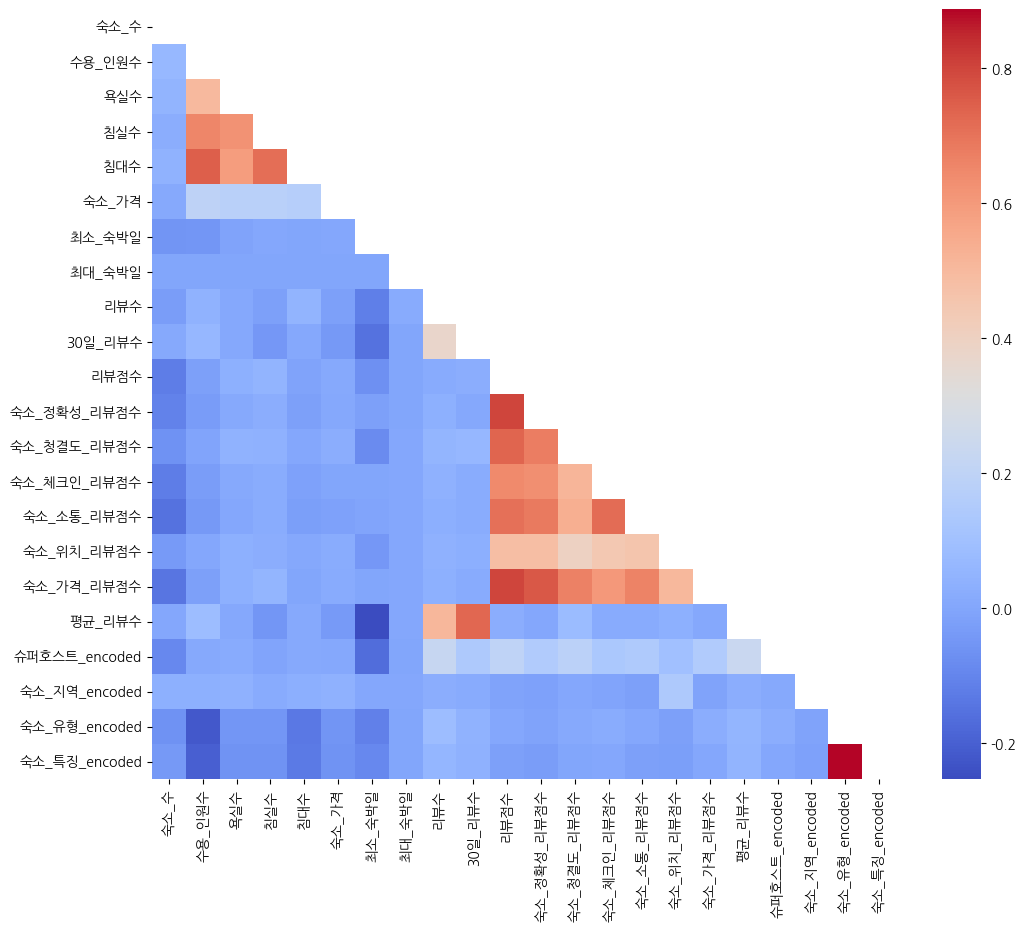

In [58]:
# 비트맵 시각화

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(df_normalized.corr(), dtype=bool))
heatmap = sns.heatmap(df_normalized.corr(), annot=True, cmap='coolwarm', mask=mask)
plt.show()

In [ ]:
# 0.6인 값만 출력
# 강한 양의 상관관계
high_corr_values = df_normalized.corr().stack().reset_index()
high_corr_values.columns = ['Variable1', 'Variable2', 'Correlation']
high_corr_values = high_corr_values[(high_corr_values['Correlation'] >= 0.6) & (high_corr_values['Variable1'] != high_corr_values['Variable2'])]
high_corr_values = high_corr_values.loc[high_corr_values['Variable1'] < high_corr_values['Variable2']]
print(high_corr_values)


         Variable1      Variable2  Correlation
25          수용_인원수            침실수     0.652992
26          수용_인원수            침대수     0.746653
47             욕실수            침실수     0.620471
91             침대수            침실수     0.712545
215        30일_리뷰수         평균_리뷰수     0.731085
231           리뷰점수    숙소_정확성_리뷰점수     0.800985
232           리뷰점수    숙소_청결도_리뷰점수     0.733598
233           리뷰점수    숙소_체크인_리뷰점수     0.642473
234           리뷰점수     숙소_소통_리뷰점수     0.706649
236           리뷰점수     숙소_가격_리뷰점수     0.799070
254    숙소_정확성_리뷰점수    숙소_청결도_리뷰점수     0.674715
255    숙소_정확성_리뷰점수    숙소_체크인_리뷰점수     0.631811
319     숙소_소통_리뷰점수    숙소_정확성_리뷰점수     0.682480
321     숙소_소통_리뷰점수    숙소_체크인_리뷰점수     0.715031
363     숙소_가격_리뷰점수    숙소_정확성_리뷰점수     0.759167
364     숙소_가격_리뷰점수    숙소_청결도_리뷰점수     0.667103
365     숙소_가격_리뷰점수    숙소_체크인_리뷰점수     0.605040
366     숙소_가격_리뷰점수     숙소_소통_리뷰점수     0.664435
461  숙소_유형_encoded  숙소_특징_encoded     0.887470


In [ ]:
# 0.4 이상 0.6 이하 값만 출력
# 약한 양의 상관관계

high_corr_values = df_normalized.corr().stack().reset_index()
high_corr_values.columns = ['Variable1', 'Variable2', 'Correlation']
high_corr_values = high_corr_values[(high_corr_values['Correlation'] < 0.6) & (high_corr_values['Correlation'] >= 0.4) & (high_corr_values['Variable1'] != high_corr_values['Variable2'])]
high_corr_values = high_corr_values.loc[high_corr_values['Variable1'] < high_corr_values['Variable2']]
print(high_corr_values)

       Variable1    Variable2  Correlation
24        수용_인원수          욕실수     0.499925
48           욕실수          침대수     0.592324
193          리뷰수       평균_리뷰수     0.509464
235         리뷰점수   숙소_위치_리뷰점수     0.483295
277  숙소_청결도_리뷰점수  숙소_체크인_리뷰점수     0.513719
320   숙소_소통_리뷰점수  숙소_청결도_리뷰점수     0.537010
323   숙소_소통_리뷰점수   숙소_위치_리뷰점수     0.456293
341   숙소_위치_리뷰점수  숙소_정확성_리뷰점수     0.483850
342   숙소_위치_리뷰점수  숙소_청결도_리뷰점수     0.400280
343   숙소_위치_리뷰점수  숙소_체크인_리뷰점수     0.442898
367   숙소_가격_리뷰점수   숙소_위치_리뷰점수     0.507033


회귀분석
 - 숙소_가격에 대한

In [51]:
import statsmodels.api as sm

# 종속변수와 독립변수 선택
y = df_normalized['숙소_가격']
X = df_normalized.drop(columns=['숙소_가격'])

# 상수항 추가
X = sm.add_constant(X)

# 회귀모형 적합
model = sm.OLS(y, X).fit()

# 회귀분석 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  숙소_가격   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     148.4
Date:                Thu, 30 May 2024   Prob (F-statistic):               0.00
Time:                        13:14:37   Log-Likelihood:             2.0164e+05
No. Observations:               56991   AIC:                        -4.032e+05
Df Residuals:                   56969   BIC:                        -4.030e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0003      0.001      0.566

In [53]:
# p-value가 0.05 이상인 독립변수 추출
high_pvalue_vars = model.pvalues[model.pvalues >= 0.05].index.tolist()
print(high_pvalue_vars)

['수용_인원수', '숙소_가격', '최대_숙박일', '평균_리뷰수', '숙소_유형_encoded']


In [54]:
# p-value가 0.05 이상인 독립변수 제외
X_filtered = X.drop(columns=high_pvalue_vars)

# 다시 회귀모형 적합
model_filtered = sm.OLS(y, X_filtered).fit()

# 수정된 회귀분석 결과 출력
print(model_filtered.summary())

                            OLS Regression Results                            
Dep. Variable:                   리뷰점수   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                 1.268e+04
Date:                Thu, 30 May 2024   Prob (F-statistic):               0.00
Time:                        13:19:19   Log-Likelihood:             1.0633e+05
No. Observations:               56991   AIC:                        -2.126e+05
Df Residuals:                   56974   BIC:                        -2.125e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0086      0.003      3.046

회귀분석
 - 리뷰 점수에 대한

In [52]:
import statsmodels.api as sm

# 종속변수와 독립변수 선택
y = df_normalized['리뷰점수']
X = df_normalized.drop(columns=['리뷰점수'])

# 상수항 추가
X = sm.add_constant(X)

# 회귀모형 적합
model = sm.OLS(y, X).fit()

# 회귀분석 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   리뷰점수   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     9661.
Date:                Thu, 30 May 2024   Prob (F-statistic):               0.00
Time:                        13:15:18   Log-Likelihood:             1.0634e+05
No. Observations:               56991   AIC:                        -2.126e+05
Df Residuals:                   56969   BIC:                        -2.124e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0094      0.003      3.243

In [55]:
# p-value가 0.05 이상인 독립변수 추출
high_pvalue_vars = model.pvalues[model.pvalues >= 0.05].index.tolist()
print(high_pvalue_vars)

['수용_인원수', '숙소_가격', '최대_숙박일', '평균_리뷰수', '숙소_유형_encoded']


In [56]:
# p-value가 0.05 이상인 독립변수 제외
X_filtered = X.drop(columns=high_pvalue_vars)

# 다시 회귀모형 적합
model_filtered = sm.OLS(y, X_filtered).fit()

# 수정된 회귀분석 결과 출력
print(model_filtered.summary())

                            OLS Regression Results                            
Dep. Variable:                   리뷰점수   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                 1.268e+04
Date:                Thu, 30 May 2024   Prob (F-statistic):               0.00
Time:                        13:19:58   Log-Likelihood:             1.0633e+05
No. Observations:               56991   AIC:                        -2.126e+05
Df Residuals:                   56974   BIC:                        -2.125e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0086      0.003      3.046